<center>
 <h2> ILI286 - Computación Científica II </h2>
<h1>Tarea 3</h1></center>
<br>
<left>Nombre: Erick Barrera G. <br> Correo: <a>erick.barrera@alumnos.usm.cl</a> <br> ROL: 201073529-K</left>
<br>
<h2>__Introducción:__</h2>

A continuación se analizaran y resolverán ecuaciones integrales lineales mediante métodos de integración numérica

<h2>__Desarrollo y análisis de resultados:__</h2>

### Librerias:

In [9]:
import numpy as np
%matplotlib inline
#%matplotlib
import matplotlib.pyplot as plt;
import sympy as sym
import scipy as sp
from timeit import default_timer  as timer
from numpy.linalg import norm, solve, qr

<div id='Int' />
### 2.1:
\begin{align}
 y(x)&= x + \int_0^1 x^2\,t\, y(t) \,dt \hspace{4.2cm} (10) \\ 
 x &= y(x) - \int_0^1 x^2\,t\, y(t) \,dt \hspace{4.2cm} (11) \\
 \hspace{1cm}
 \end{align}
 Para punto medio se tiene:
 
\begin{align}
 h= \frac{(b-a)}{2}=\frac{(1-0)}{2}=0,5 \\
 \\
 x &= y(x) - \lambda\sum_{j=0}^n x^2\,t_j\, y(t_j)\, \begin{bmatrix} 0,5 & 0,5 \\  0,5 & 0,5 \end{bmatrix}  \ (12) \\
 \begin{bmatrix} x_1  \\  x_2 \end{bmatrix} &= \begin{bmatrix} y_1 \\  y_2 \end{bmatrix} - \sum_{j=0}^n \begin{bmatrix} x_1^3 & x_1^2*x_2 \\  x_2^2*x_1 & x_2^3 \end{bmatrix}\, \begin{bmatrix} y_1 \\  y_2 \end{bmatrix}\, \begin{bmatrix} 0,5 & 0,5 \\  0,5 & 0,5 \end{bmatrix}  \quad 
\hspace{1cm} (13)
\end{align}

Con: 
\begin{align}
 x_1=0,25  \\
 x_2=0,75
\end{align}
\begin{equation} 
\begin{bmatrix} 0,25  \\  0,75 \end{bmatrix} = (I -  \begin{bmatrix} 0,015625 & 0,046875 \\  0,140625 & 0,421875 \end{bmatrix}\ \odot \begin{bmatrix} 0,5 & 0,5 \\  0,5 & 0,5 \end{bmatrix}  ) \cdot \begin{bmatrix} y_1  \\  y_2 \end{bmatrix} \hspace{1cm} (14)
\end{equation}

\begin{equation} 
\begin{bmatrix} 0,25  \\  0,75 \end{bmatrix} =  \begin{bmatrix} 1-0,0078125 & -0,0234375 \\  -0,0703125 & 1-0,2109375 \end{bmatrix}\  \cdot \begin{bmatrix} y_1  \\  y_2 \end{bmatrix} \hspace{1cm}
\end{equation}

Finalmente se tiene:

\begin{equation} 
\begin{bmatrix} 0,25  \\  0,75 \end{bmatrix} =  \begin{bmatrix} 0.9921875 & -0,0234375 \\  -0,0703125 & 0.78900625 \end{bmatrix}\  \cdot \begin{bmatrix} y_1  \\  y_2 \end{bmatrix} \hspace{1cm}
\end{equation}

### 2.2)

In [2]:
##2

def midpoint_weights(n,a,b):
    if (n==1):
        return np.array([b-a])
    else:
        w=np.zeros((n,n))
        w.fill((b-a)/n)
        return w

def simpson_weights(n,a,b):
    if(n==1):
        h=(b-a)/2
        w=np.zeros((2*n+1,2*n+1))
        w[:,0]=h/3
        w[:,1]=4*h/3
        w[:,2]=h/3
        return w
    else:
        h=(b-a)/(2*n)
        w=np.zeros((2*n+1,2*n+1))
        for i in range (2*n+1):
            if(i==0 or i==2*n):
                w[:,i]=h/3
            elif(i%2==0):
                w[:,i]=2*h/3
            else:
                w[:,i]=4*h/3
        return w
def trapezoid_weights(n,a,b):
    if(n==1):
        h=b-a
        w=np.zeros((n+1,n+1))
        w.fill(h/2)
        return w
    else:
        h=(b-a)/n
        w=np.zeros((n+1,n+1))
        for i in range (n+1):
            if(i==0 or i==n):
                w[:,i]=h/2
            else:
                w[:,i]=2*h/2
        return w
        
                
    
k=np.array([[0.015625, 0.046875 ],[0.140625,0.421875]])
w=np.array([[0.5, 0.5 ],[0.5,0.5]])
w=trapezoid_weights(4,0,1)
print (w)

[[ 0.125  0.25   0.25   0.25   0.125]
 [ 0.125  0.25   0.25   0.25   0.125]
 [ 0.125  0.25   0.25   0.25   0.125]
 [ 0.125  0.25   0.25   0.25   0.125]
 [ 0.125  0.25   0.25   0.25   0.125]]


### 2.3)

Para 1 $K=xt$ y $g(x)=1$ y es de tipo 2, ya que tiene un $y(x)$ fuera de la integral.

Para 2 $K=x-t$ y $g(x)=x^3$ y es de tipo 2, ya que tiene un $y(x)$ fuera de la integral. 

Para 3 $K=x$ y $g(x)=sin(7x)-\frac{x}{4}$ y es de tipo 2, ya que tiene un $y(x)$ fuera de la integral.



In [3]:
def kernel_matrix(k,x):
    km=np.zeros((x.size,x.size))
    for i in range (x.size):
        for j in range (x.size):
            km[i,j]=k(x[i],x[j])
    return km
#f= lambda x,t: x+t

#x=np.linspace(0,1,5)
#kernel_matrix(f,x)

def vector_G(g,x):
    gv=np.zeros((x.size,1))
    for i in range (x.size):
        gv[i]=g(x[i])
    return gv
#f2= lambda x: x/2
#vector_G(f2,x)

### 2.4

In [4]:
def solve_fredholm_equation(K,x,G,W):
    I=np.identity(x.size)
    A=I- np.multiply(K,W)
    y=np.linalg.solve(A,G)
    return y

##función que recibe Función que recibe, la función k, g, el vector x y la matriz de
##pesos para devolver el valor de y
def sfe(kf,gf,x,w):
    k=kernel_matrix(kf,x)
    g=vector_G(gf,x)
    y=solve_fredholm_equation(k,x,g,w)
    return y
##Retorna los intervalos para los 3 métodos con m intervalos
def isfe(a,b,m):
    h=(b-a)/m
    xm=np.linspace(0,1,m+1)+h/2
    xm=xm[:-1]
    xt=np.linspace(0,1,m+1)
    xs=np.linspace(0,1,2*m+1)
    return xm,xt,xs
##Retorna las matrices de pesos para los 3 métodos con m intervalos
def wsfe(a,b,m):
    wm=midpoint_weights(m,a,b)
    wt=trapezoid_weights(m,a,b)
    ws=simpson_weights(m,a,b)
    return wm,wt,ws

### 2.5

In [10]:
k1= lambda x,t: x*t
g1=lambda x: 1
y1s= lambda x: 1+ 3*x/4
k2= lambda x,t: x-t
g2= lambda x: x**3
y2s= lambda x: (1/130)*(130*x**3 +21*x-22)
k3= lambda x,t: x
g3=lambda x: -x/4 +np.sin(7*x)
y3s= lambda x: (6*x+7*np.sin(7*x)*np.pi**2-56*np.sin(7*x))/(7*np.pi**2 - 8)


a=0
b=1
em1=np.zeros((10))
em2=np.zeros((10))
em3=np.zeros((10))
et1=np.zeros((10))
et2=np.zeros((10))
et3=np.zeros((10))
es1=np.zeros((10))
es2=np.zeros((10))
es3=np.zeros((10))
for i in range (1,11):
    m=i
    wm,wt,ws=wsfe(a,b,m)
    xm,xt,xs=isfe(a,b,m)
    ##pm 1
    ym=sfe(k1,g1,xm,wm)
    y=y1s(xm)
    em1[i-1]=np.mean(np.abs(ym-y[np.newaxis, :].T ))
    ##pm 2
    ym=sfe(k2,g2,xm,wm)
    y=y2s(xm)
    em2[i-1]=np.mean(np.abs(ym-y[np.newaxis, :].T ))
    ##tr 1
    yt=sfe(k1,g1,xt,wt)
    y=y1s(xt)
    et1[i-1]=np.mean(np.abs(yt-y[np.newaxis, :].T ))
    ##tr2
    yt=sfe(k2,g2,xt,wt)
    y=y2s(xt)
    et2[i-1]=np.mean(np.abs(yt-y[np.newaxis, :].T ))
    ##sm 1
    ys=sfe(k1,g1,xs,ws)
    y=y1s(xs)
    es1[i-1]=np.mean(np.abs(ys-y[np.newaxis, :].T ))
    ##sm 2
    ys=sfe(k2,g2,xs,ws)
    y=y2s(xs)
    es2[i-1]=np.mean(np.abs(ys-y[np.newaxis, :].T ))
a=0
b=np.pi/2
for i in range (1,11):
    m=i
    wm,wt,ws=wsfe(a,b,m)
    xm,xt,xs=isfe(a,b,m)
    ##pm 3
    ym=sfe(k3,g3,xm,wm)
    y=y3s(xm)
    em3[i-1]=np.mean(np.abs(ym-y[np.newaxis, :].T ))
    ##tr 3
    yt=sfe(k3,g3,xt,wt)
    y=y3s(xt)
    et3[i-1]=np.mean(np.abs(yt-y[np.newaxis, :].T ))
    ##sm 3
    ys=sfe(k3,g3,xs,ws)
    y=y3s(xs)
    es3[i-1]=np.mean(np.abs(ys-y[np.newaxis, :].T ))
    
#print(y, y3s(xs))
#print(np.mean(aux))

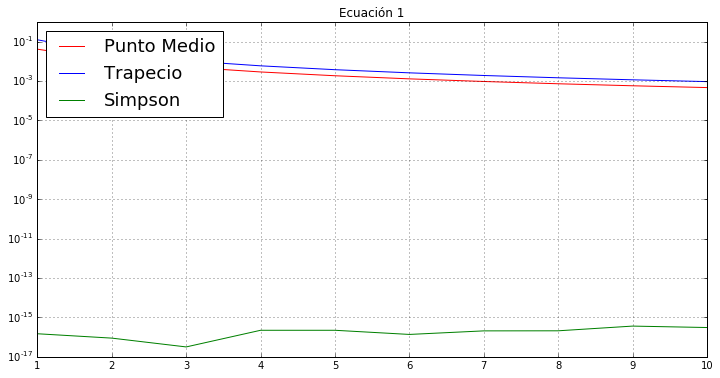

In [6]:
x=np.linspace(1,10,10)
plt.figure(1,figsize=(12,6))
plt.title('Ecuación 1' )
plt.semilogy(x, em1, 'k-',label = 'Punto Medio', c='r')
plt.semilogy(x, et1, 'k-',label = 'Trapecio', c='b')
plt.semilogy(x, es1, 'k-',label = 'Simpson', c='g')
plt.legend(loc = 2,prop={'size':18})
plt.grid(True)
plt.show()

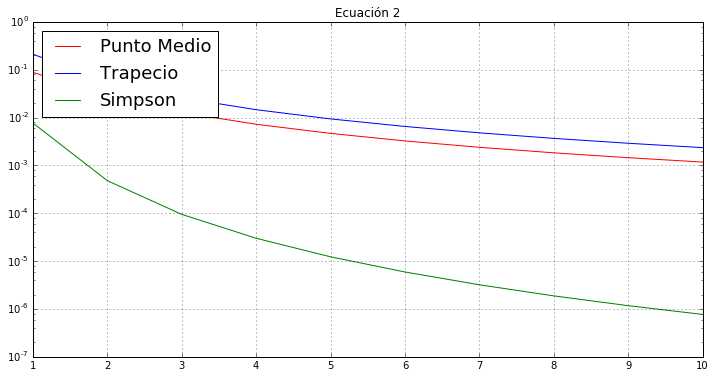

In [7]:
x=np.linspace(1,10,10)
plt.figure(1,figsize=(12,6))
plt.title('Ecuación 2' )
plt.semilogy(x, em2, 'k-',label = 'Punto Medio', c='r')
plt.semilogy(x, et2, 'k-',label = 'Trapecio', c='b')
plt.semilogy(x, es2, 'k-',label = 'Simpson', c='g')
plt.legend(loc = 2,prop={'size':18})
plt.grid(True)
plt.show()

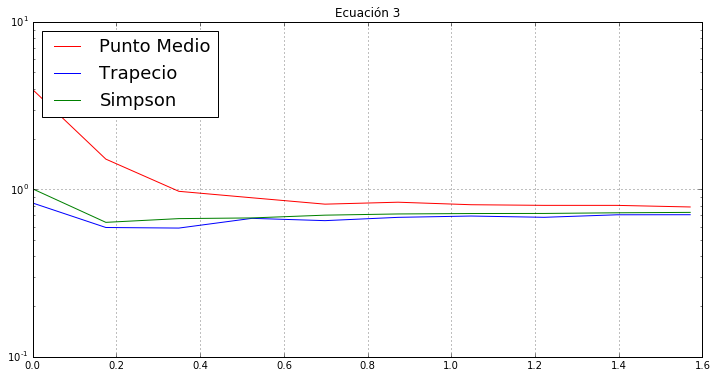

In [8]:
x=np.linspace(0,np.pi/2,10)
plt.figure(1,figsize=(12,6))
plt.title('Ecuación 3' )
plt.semilogy(x, em3, 'k-',label = 'Punto Medio', c='r')
plt.semilogy(x, et3, 'k-',label = 'Trapecio', c='b')
plt.semilogy(x, es3, 'k-',label = 'Simpson', c='g')
plt.legend(loc = 2,prop={'size':18})
plt.grid(True)
plt.show()

Se puede apreciar que Simpson es mejor en la primera y segunda ecuación, esto era esperable dado que estas son de grado 1 y 3 y Simpson tiene un error del método que considera la cuarta derivada. Para estas mismas ecuaciones, punto medio y trapecio se comportan de forma similar, ambas tienen un error que considera la segunda derivada, siendo mayor el de trapecio, hecho apreciable dentro de los gráficos. La tercera ecuación incorpora una función seno, la cual indica que los errores de por si serán mayores para los métodos comparados con las ecuaciones anteriores, para este caso, trapecio se comporta mejor que Simpson y que punto medio.

### 6

El punto medio realiza bien aproximaciones para ecuaciones lineales, pero pierde mucha precisión al ser utilizado para otro tipo, su gran ventaja es la simplicidad del método que permite que este sea ejecutado en menor tiempo (se puede apreciar esto en la cantidad de puntos evaluados). Trapecio y Simpson tienen mejores aproximaciones en casos más complejos, Simpson inclusive en ecuaciones de grado 1 y 2 tiene error cercano a $e_m$, pero ambos métodos son más costosos que punto medio, Simpson siendo el más costoso de ambos (evalúa más puntos). La principal desventaja de utilizar la cuadratura, es la transformación de la ecuación a una que pueda ser resuelta por esta, agregando un paso más a la resolución, y el costo que tiene el armar la matriz de pesos, que es mucho mayor que para los otros métodos

<h2>__Conclusión:__</h2>

Se logró utilizar métodos de integración numérica para la resolución de ecuaciones integrales lineales, ver cómo se comportan dichos métodos para distintos tipos de ecuación de acuerdo a su grado y el error de cada uno.


<h2>__Referencias:__</h2>

* _numpy_ http://www.numpy.org
* _matplotlib_ http://matplotlib.org

